# Mushroom classification

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing

In [3]:
df_mushroom=pd.read_csv("C:/Users/HP/anaconda3/DataScience/DataTrainedProjects/Mushroom.csv")

In [4]:
df_mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
# checking the shape of the dataset
df_mushroom.shape

(8124, 23)

In [6]:
#checking unique values
df_mushroom["class"].unique()

array(['p', 'e'], dtype=object)

In [7]:
df_mushroom.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [8]:
x=df_mushroom.drop('class',axis=1)

In [9]:
y=df_mushroom['class']

The output class contains 2 unique values either poisonous(p) or edible(e)

### Visualizing the features

In [10]:
count=df_mushroom['class'].value_counts()

## Univariate Analysis

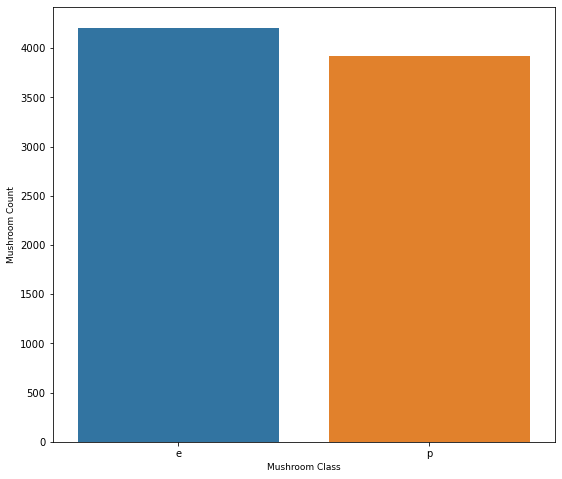

In [11]:
plt.figure(figsize=(9, 8))
sns.barplot(x=count.index, y=count.values)
plt.xlabel('Mushroom Class', fontsize=9)
plt.ylabel('Mushroom Count', fontsize=9)
# plt.savefig('labelcount.png', format='png', dpi=900)
plt.show()

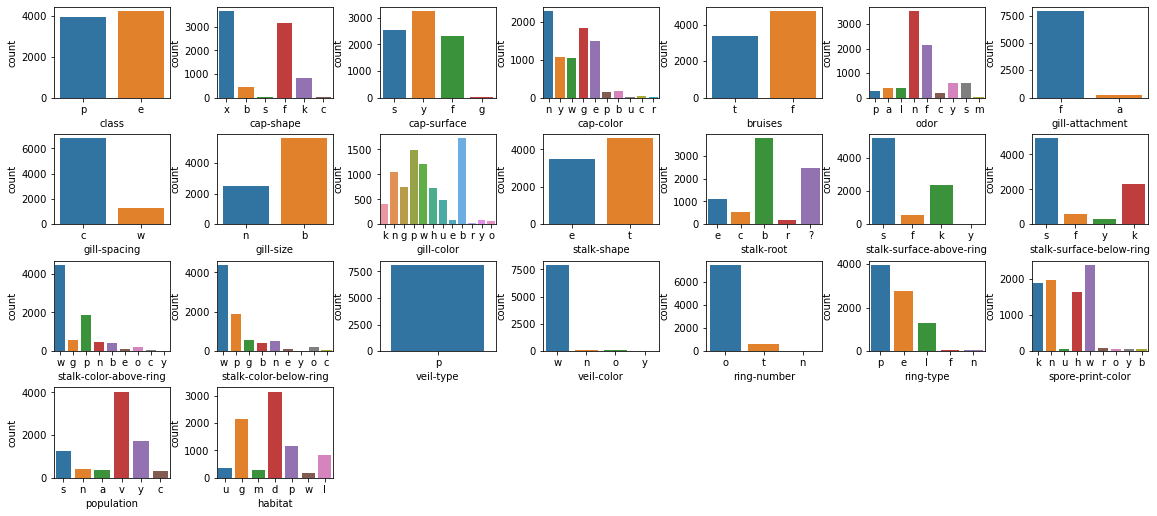

In [12]:
figure = plt.figure(figsize=(19 , 19))
for i, c in enumerate(df_mushroom.columns):
    figure.add_subplot(10, 7, i+1)
    sns.countplot(x = f"{c}", data=df_mushroom)
    plt.subplots_adjust(left=0.1,
                    bottom=0, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
# plt.savefig('cat.png', format='png', dpi=1200)
plt.show()

###### As the veil-type feature is not contributing much for co-relation with other feature,we are droping that column

In [13]:
x.drop('veil-type',axis=1,inplace=True)

### Encoding all Categorical values

In [14]:
le=preprocessing.LabelEncoder()
cols =df_mushroom.columns
df_mushroom[cols] = df_mushroom[cols].apply(le.fit_transform)
df_mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


1 represents poisonous and 0 edible for class feature

In [15]:
df_mushroom.shape

(8124, 23)

<AxesSubplot:>

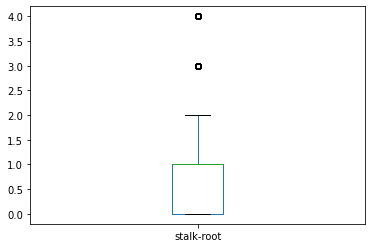

In [16]:
df_mushroom['stalk-root'].plot(kind='box')

<AxesSubplot:>

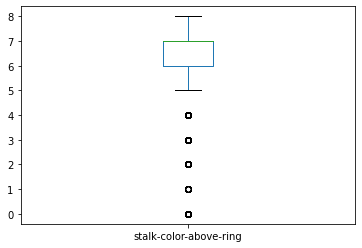

In [17]:
df_mushroom['stalk-color-above-ring'].plot(kind='box')

<AxesSubplot:>

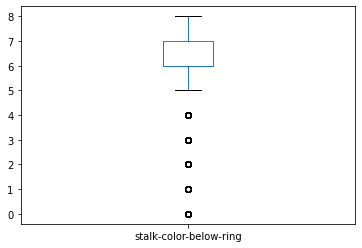

In [18]:
df_mushroom['stalk-color-below-ring'].plot(kind='box')

###### we have outliers in the following columns stalk-root,stalk-color-below-ring,stalk-color-above-ring,population

array([[<AxesSubplot:title={'center':'class'}>,
        <AxesSubplot:title={'center':'cap-shape'}>,
        <AxesSubplot:title={'center':'cap-surface'}>,
        <AxesSubplot:title={'center':'cap-color'}>,
        <AxesSubplot:title={'center':'bruises'}>],
       [<AxesSubplot:title={'center':'odor'}>,
        <AxesSubplot:title={'center':'gill-attachment'}>,
        <AxesSubplot:title={'center':'gill-spacing'}>,
        <AxesSubplot:title={'center':'gill-size'}>,
        <AxesSubplot:title={'center':'gill-color'}>],
       [<AxesSubplot:title={'center':'stalk-shape'}>,
        <AxesSubplot:title={'center':'stalk-root'}>,
        <AxesSubplot:title={'center':'stalk-surface-above-ring'}>,
        <AxesSubplot:title={'center':'stalk-surface-below-ring'}>,
        <AxesSubplot:title={'center':'stalk-color-above-ring'}>],
       [<AxesSubplot:title={'center':'stalk-color-below-ring'}>,
        <AxesSubplot:title={'center':'veil-type'}>,
        <AxesSubplot:title={'center':'veil-color'}>,


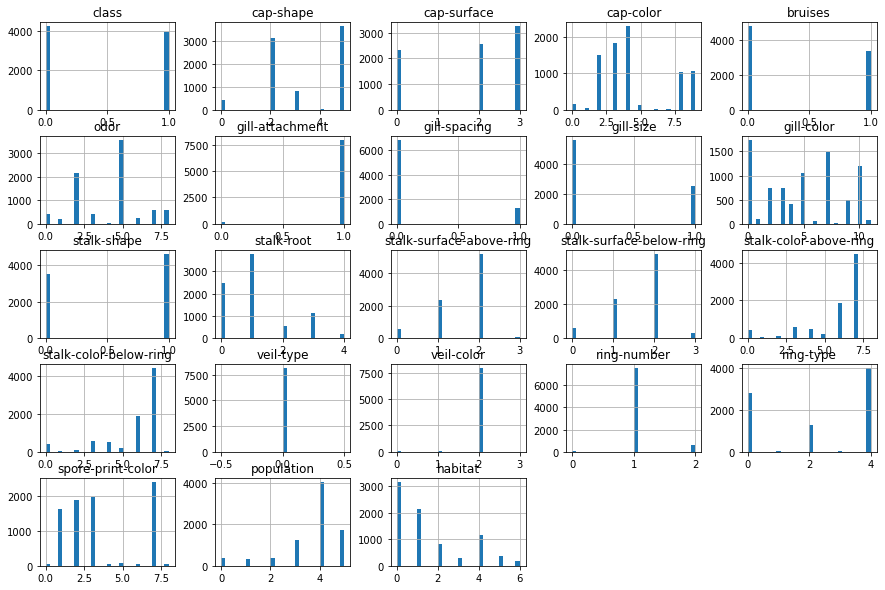

In [19]:
df_mushroom.hist(bins=30,figsize=(15,10))

In [20]:
#since veil-type column is not contributing much to the model we can drop that column
df_mushroom.drop('veil-type',axis=1,inplace=True)

### Bivariate-Analysis

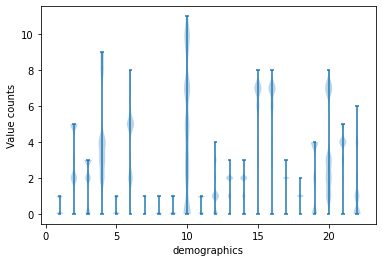

In [21]:
plt.violinplot(df_mushroom)
plt.xlabel("demographics")
plt.ylabel("Value counts")
plt.show()

<AxesSubplot:xlabel='cap-shape', ylabel='class'>

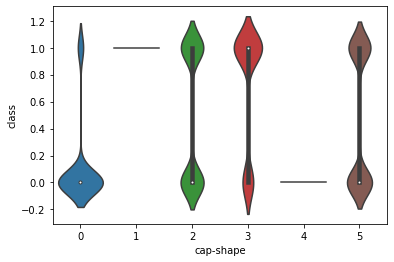

In [22]:
sns.violinplot(df_mushroom['cap-shape'],df_mushroom['class'])

###### Above observation shows cap shape with values 0,2,5 are edible and rest are poisonous

<AxesSubplot:xlabel='gill-color', ylabel='class'>

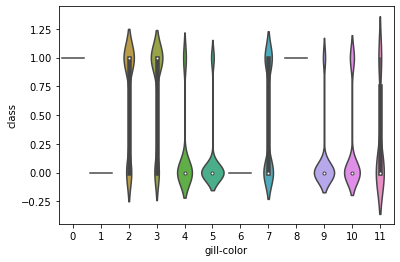

In [23]:
sns.violinplot(df_mushroom['gill-color'],df_mushroom['class'],kde=True)

###### from the above observations we found that gill color 4,5,9,10,11 show in high numbers for the edible mushrooms and others like 2,3 gill colors are poisonous

In [24]:
df_mushroom['gill-color'].unique()

array([ 4,  5,  2,  7, 10,  3,  9,  1,  0,  8, 11,  6])

### Multi variate Analysis

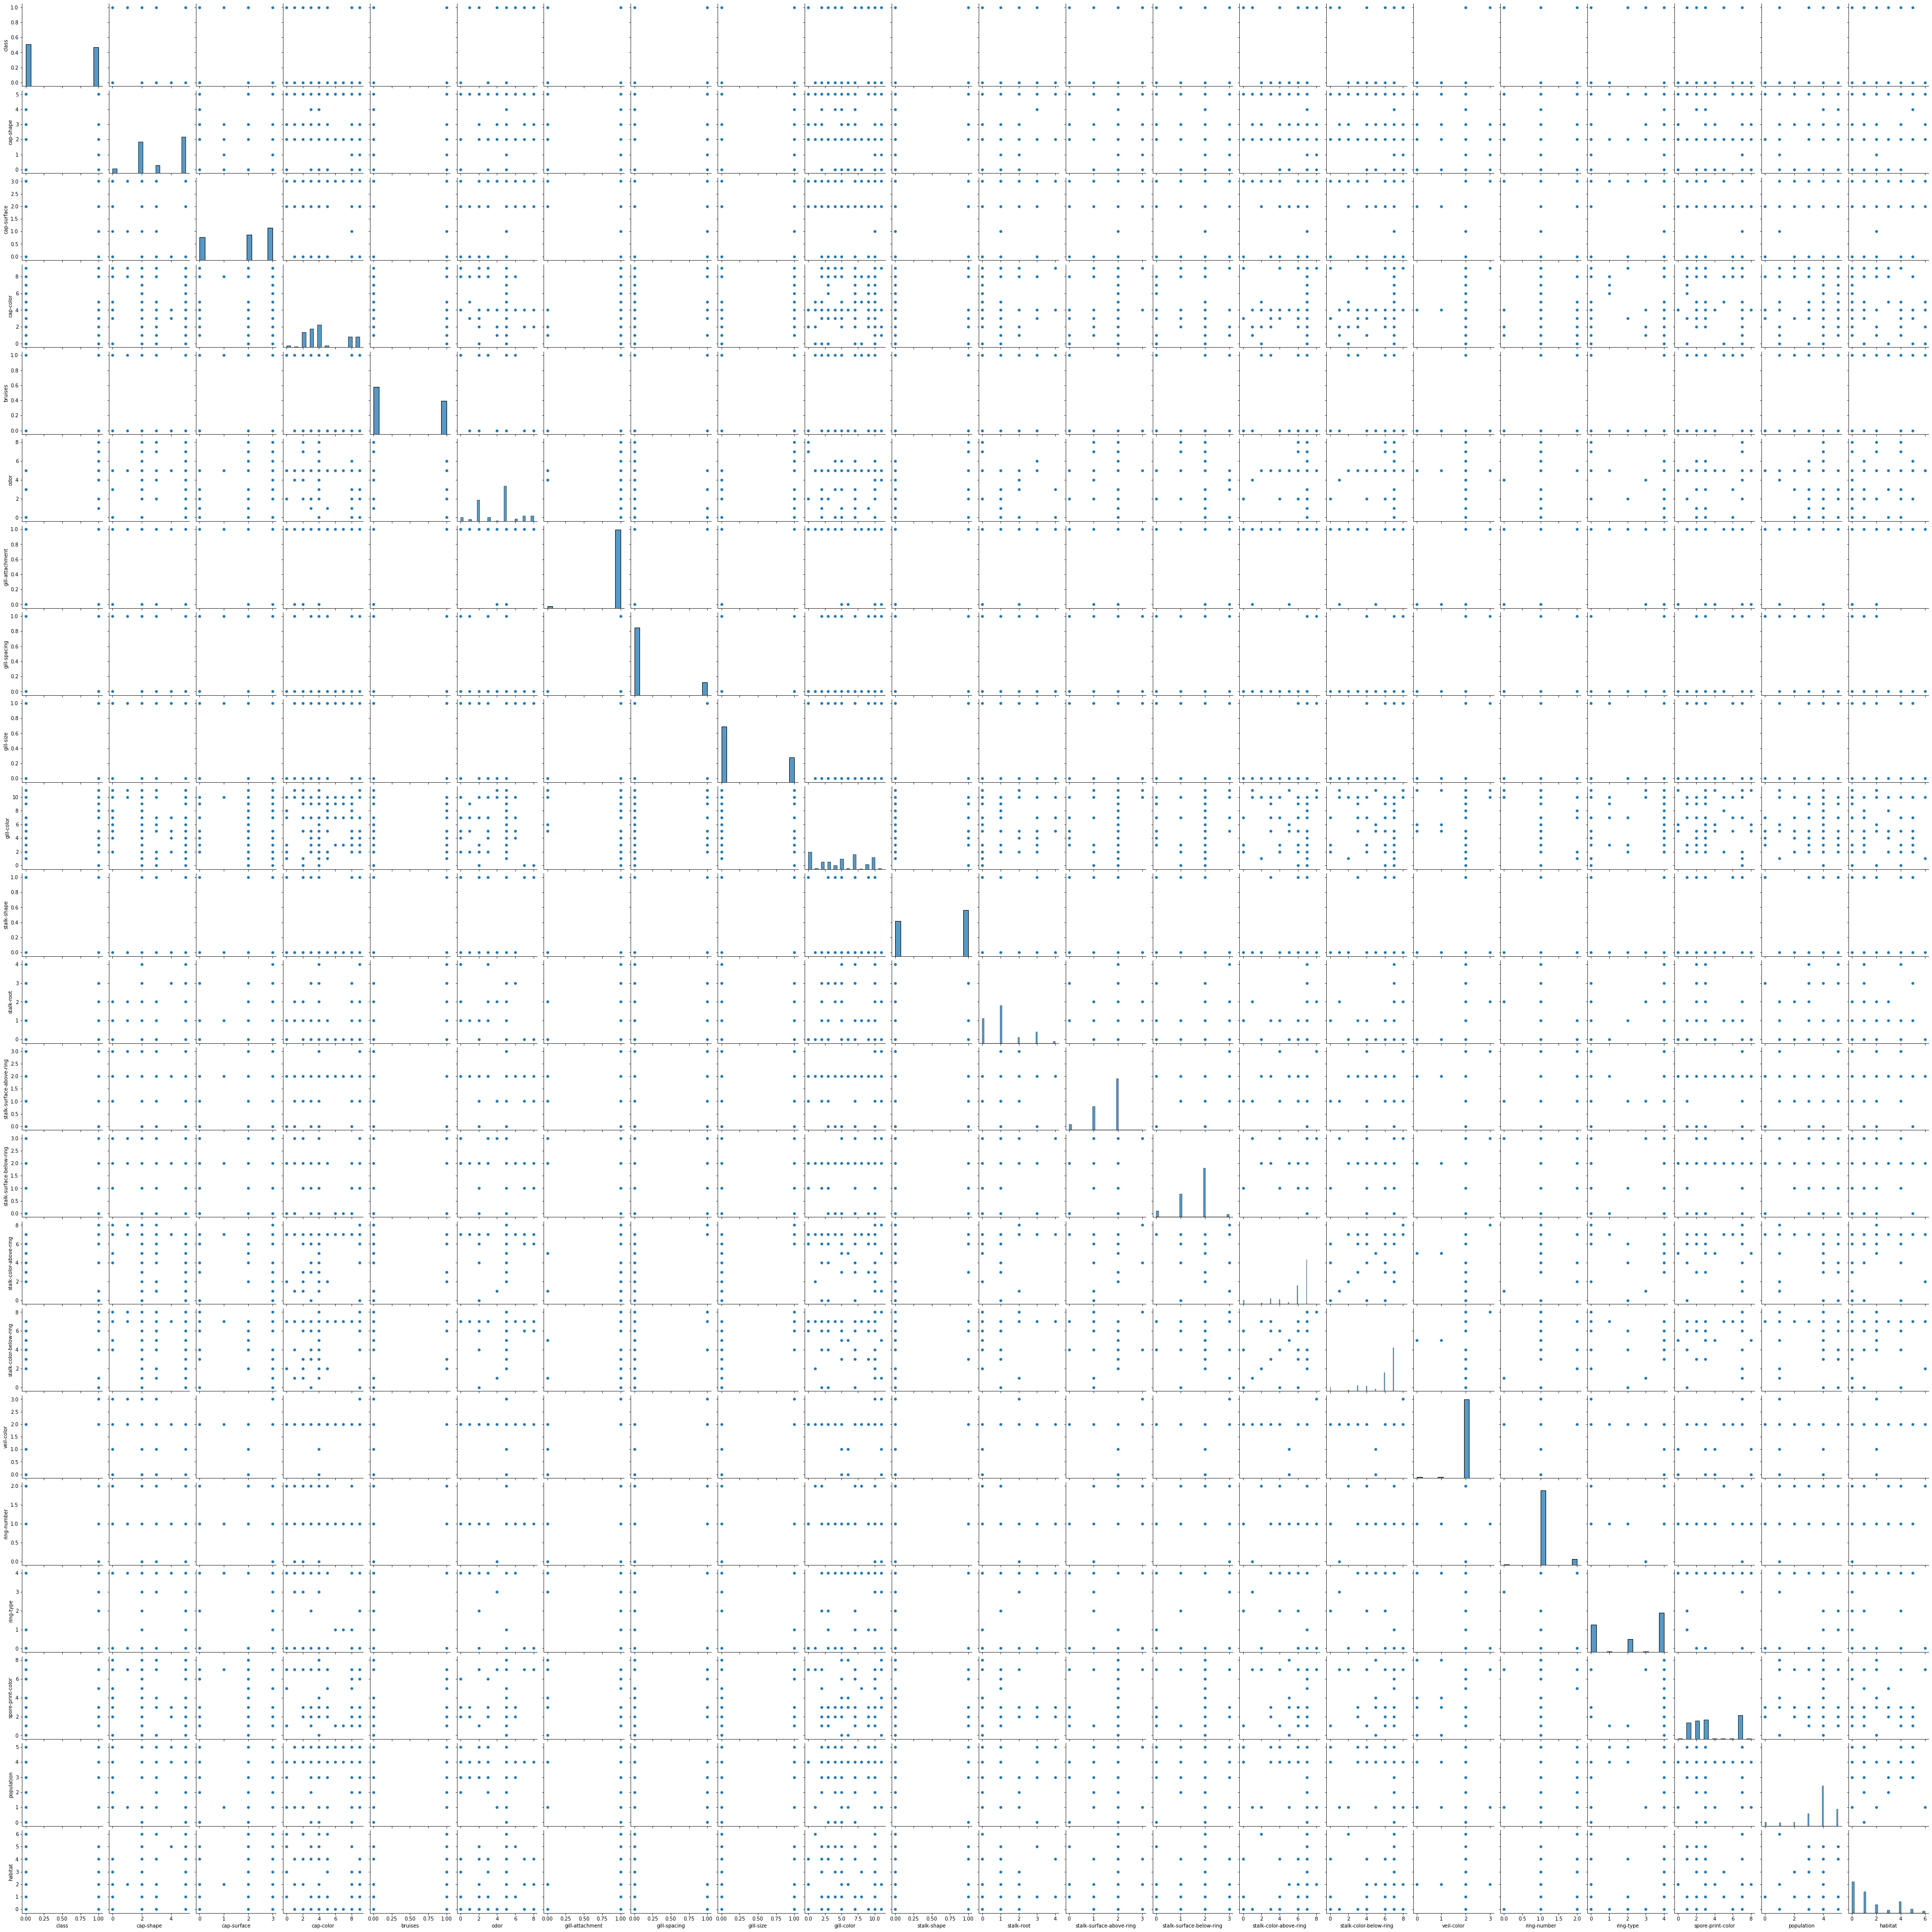

In [40]:
sns.pairplot(df_mushroom)

#### we can see that in pairplot that the datapoints are widely distributed along x & y axis.However some of the datapoints wont contribute much because its of the type category

### Removing Outliers

In [25]:
from scipy.stats import zscore
z=np.abs(zscore(df_mushroom))
z

array([[1.0366127 , 1.02971224, 0.14012794, ..., 0.67019486, 0.5143892 ,
        2.03002809],
       [0.96468045, 1.02971224, 0.14012794, ..., 0.2504706 , 1.31310821,
        0.29572966],
       [0.96468045, 2.08704716, 0.14012794, ..., 0.2504706 , 1.31310821,
        0.86714922],
       ...,
       [0.96468045, 0.8403434 , 0.14012794, ..., 1.50964337, 2.11182722,
        0.28570978],
       [1.0366127 , 0.21699152, 0.95327039, ..., 1.42842641, 0.28432981,
        0.28570978],
       [0.96468045, 1.02971224, 0.14012794, ..., 0.16925365, 2.11182722,
        0.28570978]])

In [26]:
threshold=3
print(np.where(z>3))

(array([1816, 2128, 2128, ..., 8121, 8123, 8123], dtype=int64), array([15, 14, 15, ..., 16,  6, 16], dtype=int64))


In [27]:
z[1816][15]

3.0383605317184252

In [28]:
df_mushroom_new=df_mushroom[(z<3).all(axis=1)]

In [29]:
df_mushroom_new.shape

(6568, 22)

###### After removing outliers we have almost reduced it to 6568 rows

<AxesSubplot:>

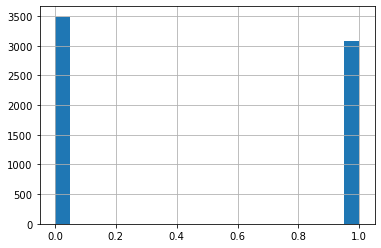

In [30]:
df_mushroom_new['class'].hist(bins=20)

In [31]:
df_mushroom_new.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


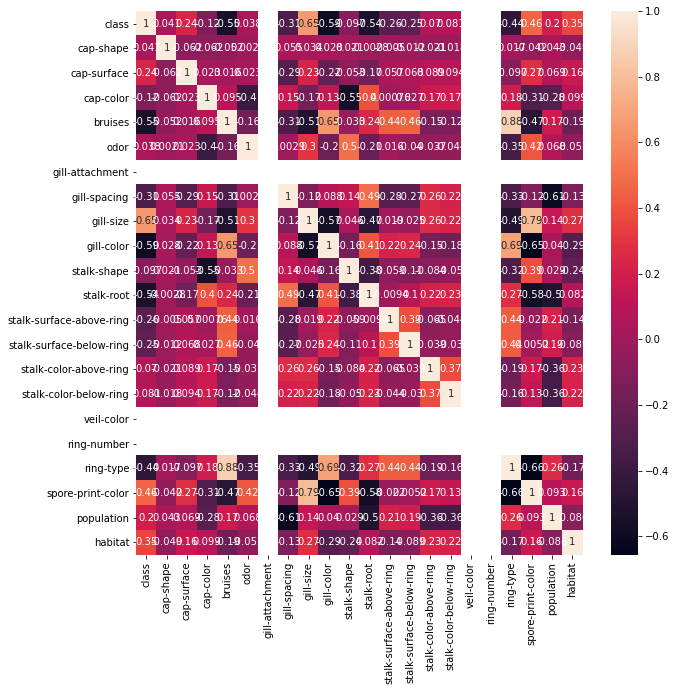

In [32]:
corr_hmap=df_mushroom_new.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [33]:
df_mushroom_new.drop(['veil-color','ring-number','gill-attachment','ring-type'],axis=1,inplace=True)

In [34]:
df_mushroom_new

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,spore-print-color,population,habitat
0,1,5,2,4,1,6,0,1,4,0,3,2,2,7,7,2,3,5
1,0,5,2,9,1,0,0,0,4,0,2,2,2,7,7,3,2,1
2,0,0,2,8,1,3,0,0,5,0,2,2,2,7,7,3,2,3
3,1,5,3,8,1,6,0,1,5,0,3,2,2,7,7,2,3,5
4,0,5,2,3,0,5,1,0,4,1,3,2,2,7,7,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8113,1,3,3,2,0,8,0,1,0,1,0,1,1,6,6,7,4,0
8116,1,3,3,4,0,7,0,1,0,1,0,2,1,6,7,7,4,2
8117,1,3,2,2,0,8,0,1,0,1,0,1,2,6,7,7,4,0
8118,1,3,3,4,0,2,0,1,0,1,0,1,2,6,7,7,4,0


### Data Modelling

In [35]:
x=df_mushroom_new.drop(['class'],axis=1)
y=df_mushroom_new["class"]

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)

### Applying Logistic Regression

In [37]:
lr= LogisticRegression()

In [38]:
lr.fit(x_train,y_train)

LogisticRegression()

In [39]:
pred=lr.predict(x_test)

In [40]:
len(pred)

1971

In [41]:
print("Accuracy score is :",accuracy_score(pred,y_test))


Accuracy score is : 0.9583967529173009


In [42]:
print(confusion_matrix(pred,y_test))

[[999  30]
 [ 52 890]]


In [43]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1029
           1       0.97      0.94      0.96       942

    accuracy                           0.96      1971
   macro avg       0.96      0.96      0.96      1971
weighted avg       0.96      0.96      0.96      1971



### Applying Naive Bayes

In [44]:
BNB= BernoulliNB()

In [45]:
BNB.fit(x_train,y_train)

BernoulliNB()

In [46]:
predict_BNB=BNB.predict(x_test)

In [47]:
print("Accuracy is :",accuracy_score(predict_BNB,y_test))

Accuracy is : 0.8432267884322678


In [48]:
print(confusion_matrix(predict_BNB,y_test))

[[1002  260]
 [  49  660]]


In [49]:
print(classification_report(predict_BNB,y_test))

              precision    recall  f1-score   support

           0       0.95      0.79      0.87      1262
           1       0.72      0.93      0.81       709

    accuracy                           0.84      1971
   macro avg       0.84      0.86      0.84      1971
weighted avg       0.87      0.84      0.85      1971



### Applying Decision Tree classifier

In [50]:
dt=DecisionTreeClassifier()

In [51]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [52]:
predict_DT=dt.predict(x_test)

In [53]:
print("Accuracy score:",accuracy_score(predict_DT,y_test))

Accuracy score: 1.0


In [54]:
print(confusion_matrix(predict_DT,y_test))

[[1051    0]
 [   0  920]]


In [55]:
print(classification_report(predict_DT,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1051
           1       1.00      1.00      1.00       920

    accuracy                           1.00      1971
   macro avg       1.00      1.00      1.00      1971
weighted avg       1.00      1.00      1.00      1971



### Applying Support Vector Machine

In [56]:
sv=SVC()

In [57]:
sv.fit(x_train,y_train)

SVC()

In [58]:
predict_svc=sv.predict(x_test)

In [59]:
print("Accuracy is :",accuracy_score(predict_svc,y_test))

Accuracy is : 0.9964485032978183


In [60]:
print(confusion_matrix(predict_svc,y_test))

[[1049    5]
 [   2  915]]


In [61]:
print(classification_report(predict_svc,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1054
           1       0.99      1.00      1.00       917

    accuracy                           1.00      1971
   macro avg       1.00      1.00      1.00      1971
weighted avg       1.00      1.00      1.00      1971



### Applying K-Nearest Neibours

In [62]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [63]:
predict_knn=knn.predict(x_test)

In [64]:
predict_knn

array([0, 1, 1, ..., 1, 0, 1])

In [65]:
print("Accuracy is:",accuracy_score(predict_knn,y_test))

Accuracy is: 0.9979705733130391


In [66]:
print(confusion_matrix(predict_knn,y_test))

[[1048    1]
 [   3  919]]


In [67]:
print(classification_report(predict_knn,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1049
           1       1.00      1.00      1.00       922

    accuracy                           1.00      1971
   macro avg       1.00      1.00      1.00      1971
weighted avg       1.00      1.00      1.00      1971



In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

parameters = {'criterion':['gini', 'entropy'],'max_features':["auto", "sqrt", "log2"]}
clf = GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)

dtscore = cross_val_score(dt,x,y,cv=2)
dtc = dtscore.mean()
print('Cross Val Score:',dtc*100)

print(clf.best_params_)

Cross Val Score: 77.9537149817296
{'criterion': 'gini', 'max_features': 'auto'}


In [69]:
dt= DecisionTreeClassifier(criterion="gini",max_features="auto")
dt.fit(x_train, y_train)
dt.score(x_train, y_train)
pred_decision = dt.predict(x_test)

dts= accuracy_score(y_test,pred_decision)
print('Accuracy Score',dts*100)


Accuracy Score 100.0


In [70]:
import pickle
filename = 'mushroom.pkl'
pickle.dump(dt, open(filename, 'wb'))

In [71]:
loaded_model = pickle.load(open('mushroom.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result*100)

100.0


In [72]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

In [73]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970
Predicted,0,1,1,0,0,1,0,0,1,0,...,1,1,0,0,0,1,0,1,0,1
Original,0,1,1,0,0,1,0,0,1,0,...,1,1,0,0,0,1,0,1,0,1
